#### **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#### **Collecting Data**

In [2]:
df = pd.read_csv("../data/processed/Stocks4.csv")

In [3]:
df.head()

,date,open,adj_close,rolling_ma,RSI,MACD,Signal_Line,MACD_Histogram,SMA_20,upper_band,lower_band
0,1980-12-15,0.094005,0.093575,0.097789,0.000000,-0.000411,-0.000082,-0.000329,0.098235,0.105519,0.090951
1,1980-12-16,0.087136,0.086707,0.095774,0.000000,-0.001276,-0.000321,-0.000955,0.097137,0.110273,0.084001
2,1980-12-17,0.088853,0.088853,0.094516,17.932971,-0.001768,-0.000610,-0.001158,0.096348,0.109358,0.083339
3,1980-12-18,0.091429,0.091429,0.093955,34.260996,-0.001928,-0.000874,-0.001054,0.095880,0.107771,0.083989
4,1980-12-19,0.097009,0.097009,0.094510,56.093525,-0.001586,-0.001016,-0.000570,0.095988,0.106579,0.085396


In [4]:
df.columns

Index(['date', 'open', 'adj_close', 'rolling_ma', 'RSI', 'MACD', 'Signal_Line',
       'MACD_Histogram', 'SMA_20', 'upper_band', 'lower_band'],
      dtype='object')

##### **Making data ready for model**

- Drop output columns
- Scale the input features using StandardScaler
- Scale the output feature using StandardScaler

In [5]:
features = df.drop(columns = ["adj_close", "date"])
target = df[['adj_close']]

feature_scaler = StandardScaler()
target_scaler = StandardScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target)

- Plot and observe the scaled target value

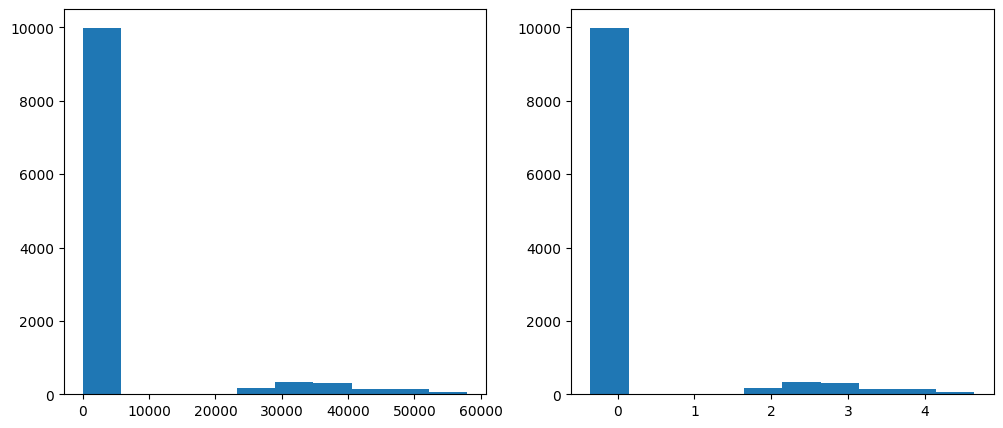

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

ax[0].hist(target)
ax[1].hist(scaled_target)

plt.show()

- Making sequence ready for model training
- We use n number of previous records to predict the next record
- Here we are taking n as 5

In [7]:
window_size = 5

In [9]:
x, y = [], []

for i in range(len(scaled_features) - window_size):
    x.append(scaled_features[i : i + window_size])
    y.append(scaled_target[i + window_size])

X = np.array(x)
y = np.array(y)

- x.shape = (no. of records, no. of previous records, no. of features)
- y.shape = (no. of records, no. of features (output value))

In [10]:
X.shape, y.shape

((11159, 5, 9), (11159, 1))

- split train and test data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
x_train.shape, y_train.shape, y_train.shape, y_test.shape

((8927, 5, 9), (8927, 1), (8927, 1), (2232, 1))

##### **Defining model**

In [13]:
# Define LSTM model
model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(window_size, X.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(25),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse')
model.summary()


c:\Users\smoha\OneDrive\Desktop\Stocks\Stock_Price_Prediction\newVenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 32)          │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,547 (56.82 KB)

 Trainable params: 14,547 (56.82 KB)

 Non-trainable params: 0 (0.00 B)

##### **Training model**

- Training model on x_train and y_train

In [14]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1586
Epoch 2/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036
Epoch 3/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027
Epoch 4/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023
Epoch 5/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0022
Epoch 6/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016
Epoch 7/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014
Epoch 8/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014
Epoch 9/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013
Epoch 10/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0016


- Predicting for a sample test value

In [15]:
v = model.predict(x_test[500].reshape(1, 5, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


In [16]:
target_scaler.inverse_transform([y_test[500]])

array([[0.60469335]])

In [17]:
target_scaler.inverse_transform(v)

array([[71.72282]], dtype=float32)

- Evaluating model

In [18]:
r2_score(y_test, model.predict(x_test))

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.9989797666874444

##### **Saving model**

In [19]:
model.save("../models/stock-prediction.h5")